# Part One: Network Models

Watts-Strogatz Networks

Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. 

Describe what happens to the network when p = 1.

In [1]:
# Importing the required libraries
import networkx as nx

import numpy as np
import random
import collections

import itertools
import random
import math
import matplotlib.pyplot as plt

from __future__ import division

from networkx.generators.classic import empty_graph


import plotly.plotly as py

%matplotlib inline

import io
import re
import os

from operator import itemgetter
from collections import Counter
import urllib2
import json

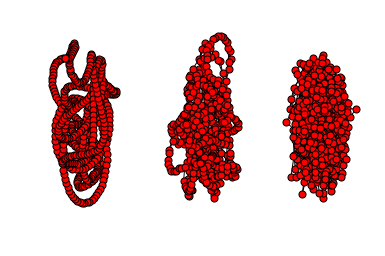

In [2]:
# Generating 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1.

ws1=nx.watts_strogatz_graph(500,4,0)
ws2=nx.watts_strogatz_graph(500,4,0.1)
ws3=nx.watts_strogatz_graph(500,4,1)

plt.subplot(1,3,1)
nx.draw(ws1, node_size=50)

plt.subplot(1,3,2)
nx.draw(ws2, node_size=50)

plt.subplot(1,3,3)
nx.draw(ws3, node_size=50)

plt.show()

In [3]:
#Calculate the average shortest path length < d > for each one.

asp1 = nx.average_shortest_path_length(ws1, weight=None)
print " Shortest path length for 1st WS network is %s" %asp1

asp2 = nx.average_shortest_path_length(ws2, weight=None)
print " Shortest path length for 2nd WS network is %s" %asp2

asp3 = nx.average_shortest_path_length(ws3, weight=None)
print " Shortest path length for 3rd WS network is %s" %asp3



 Shortest path length for 1st WS network is 62.875751503
 Shortest path length for 2nd WS network is 7.55033266533
 Shortest path length for 3rd WS network is 4.77031663327


# Describe what happens to the network when p = 1.

When p=1, probability of connection increases, all the nodes get closer to each other and the path between each of the nodes decreases. This is a characteristic of real network.

For p = 0, we get total regularity, which is characterized by a high APL and a high CC; for p = 1, we have a random graph, with both low CC and low APL. The middle graph was constructed with p = .1, and at that value we get what W&S call a small world, still a high CC, because few of the original regular groups have been broken up, but with an APL almost as low as that of the random graph. 

Observation is that how few random connections lower the APL, effectively transforming a network into a collective through which information can be efficiently spread.

# Let's understand the behavior of the WS model as we increase p in more detail. 
Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. 

Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [4]:
n = 50
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
lol = []
stdlol = []


# Run the loop to create 50 networks for each p and calculate average of shortest path length for each p
# Also loop will calculate standard deviation for average shortest path length for each p
for count in p:
    sum = 0
    asplol = []
    for network in range(0,n):      
        ws11 = nx.connected_watts_strogatz_graph(500, 4, count)       
        asp = nx.average_shortest_path_length(ws11)
        #sum += asp 
        asplol.append(asp)
    avg = np.mean(asplol)
    std = np.std(asplol)
    lol.append(avg)
    stdlol.append(std)

print " List of Average Shortest path length for each p: %s"  %lol
print "\n"
print " Standard Deviations for shortest path length of 50 networks for each p : %s" %stdlol

 List of Average Shortest path length for each p: [62.875751503006022, 23.452878557114229, 12.947459559118238, 10.128671583166334, 7.6773279358717437, 6.1259318637274554]


 Standard Deviations for shortest path length of 50 networks for each p : [7.1054273576010019e-15, 4.9712320657403533, 1.4909125464876207, 0.69947488490220977, 0.28226287598007493, 0.12339673740463822]


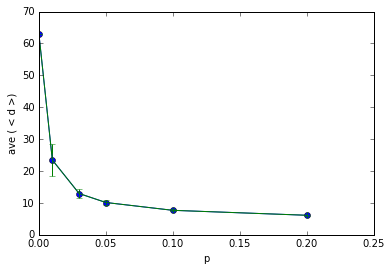

In [5]:
#Plot the average shortest path length and p. Using standard deviation to add errorbars to the plot
plt.plot(p,lol, '-o')

#plt.figure()
plt.errorbar(p, lol, xerr=0, yerr=stdlol)
plt.ylabel('ave ( < d >)')
plt.xlabel('p')


plt.show()

# The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [6]:
# Creating an initial graph
BA = nx.Graph()

# Adding nodes
BA.add_node(1)
BA.add_node(2)

#Adding links
BA.add_edge(1,2)

BA.number_of_nodes()

list_nodes = BA.nodes()


#Creating 100 nodes
for i in range (3,101):
    BA.add_node(i)
    randnode = np.random.choice(list_nodes)
    BA.add_edge(i,randnode)
    list_nodes.append(i)
    list_nodes.append(randnode)

print BA.degree()

{1: 13, 2: 13, 3: 4, 4: 10, 5: 4, 6: 3, 7: 1, 8: 1, 9: 4, 10: 9, 11: 2, 12: 1, 13: 1, 14: 1, 15: 2, 16: 2, 17: 2, 18: 1, 19: 2, 20: 3, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 7, 27: 1, 28: 2, 29: 2, 30: 3, 31: 2, 32: 3, 33: 3, 34: 1, 35: 3, 36: 3, 37: 2, 38: 3, 39: 1, 40: 1, 41: 1, 42: 2, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 3, 49: 2, 50: 4, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 2, 59: 1, 60: 4, 61: 1, 62: 1, 63: 2, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 2, 72: 1, 73: 1, 74: 2, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 2, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 2, 87: 1, 88: 2, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1}


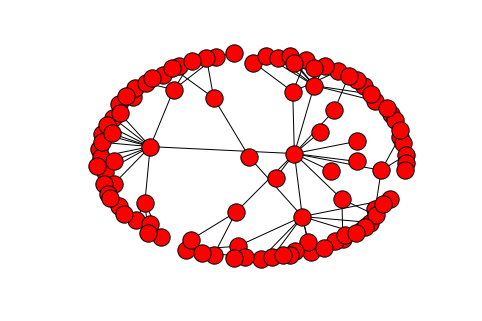

In [7]:
# Plot the graph for 100 nodes

nx.draw(BA)

plt.show()

Now create a 5000 node network.
What's the maximum and minimum degree?

In [8]:
# Creating a 5000 node network
for i in range (101,5001):
    BA.add_node(i)
    randnode = np.random.choice(list_nodes)
    BA.add_edge(i,randnode)
    list_nodes.append(i)
    list_nodes.append(randnode)



In [9]:
#creating a degree list out of the degree dictionary
deglist = []
dict = BA.degree()

for key, value in dict.iteritems():
    aValue = value
    deglist.append(aValue)
    aKey = ""
    aValue = ""

print "Maximum degree is : %s" % max(deglist)
print "Minimum degree is : %s" % min(deglist)

Maximum degree is : 116
Minimum degree is : 1


# Now, bin the degree distribution, for example using numpy.histogram.

Plot the distribution. Plot it with both linear and log-log axes.

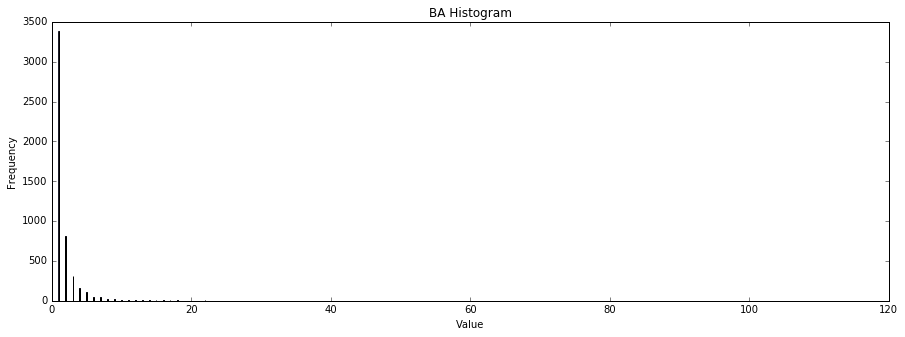

In [53]:
# plotting the degree distribution with linear axis
plt.figure(num=None, figsize=(15,5),dpi=1200)
plt.hist(deglist, bins='auto')
plt.title("BA Histogram")  # plt.hist passes it's arguments to np.histogram

plt.xlabel("Value")
plt.ylabel("Frequency")

fig3 = plt.gcf()

plt.show()


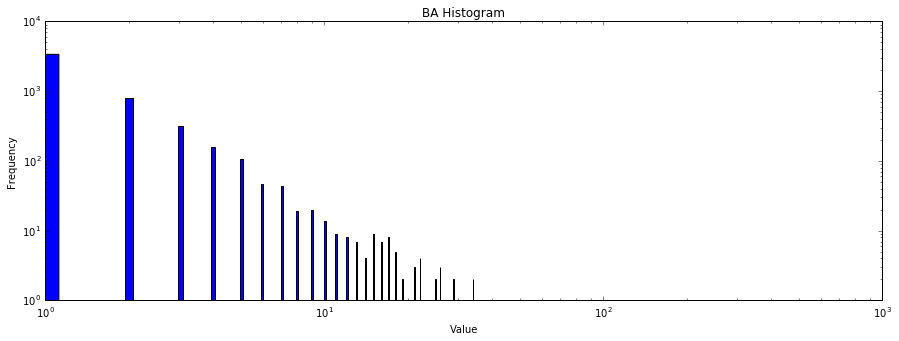

In [11]:
# plotting the degree distribution with log-log axis

plt.figure(num=None, figsize=(15,5),dpi=1200)
plt.hist(deglist, bins='auto')
plt.title("BA Histogram")  # plt.hist passes it's arguments to np.histogram

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.xscale('log')

fig3 = plt.gcf()

plt.show()

# Power-laws and the friendship paradox

Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

Pick a node i at random (e.g. use random.choice). Find its degree.

In [12]:
randnode = np.random.choice(list_nodes)
print randnode

randdegree = BA.degree(randnode)
print randdegree

2315
1


# Find i's neighbors. And calculate their average degree.

Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.


In [15]:
summ = 0

neibhr = BA.neighbors(randnode)
print neibhr
for i in neibhr:
    deg = BA.degree(i)
    summ += deg 
    frnd_mean = np.mean(summ)

print frnd_mean

# On observation we could see that on an average i's friends have more friends than i

[816]
2.0


# Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [16]:
summ = 0
ccounter = 0

for j in range(1, 1000):
    randnode = np.random.choice(list_nodes)
    #print "Random node selected is : %s" %randnode
    #print "Degree of %s is %s" %(randnode, BA.degree(randnode))
    summ = 0
    neibr = BA.neighbors(randnode)
    for i in neibr:
        deg = BA.degree(i)
        summ += deg 
        frnd_mean = np.mean(summ) 
        #print "Average Degree of Neighbor %s is : %s" %(i, avg)
    if len(neibr) > avg:
        ccounter+=1
print "Number of times Friendship paradox true is : %s " % ccounter

Number of times Friendship paradox true is : 256 


# Growth without preferential attachment

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

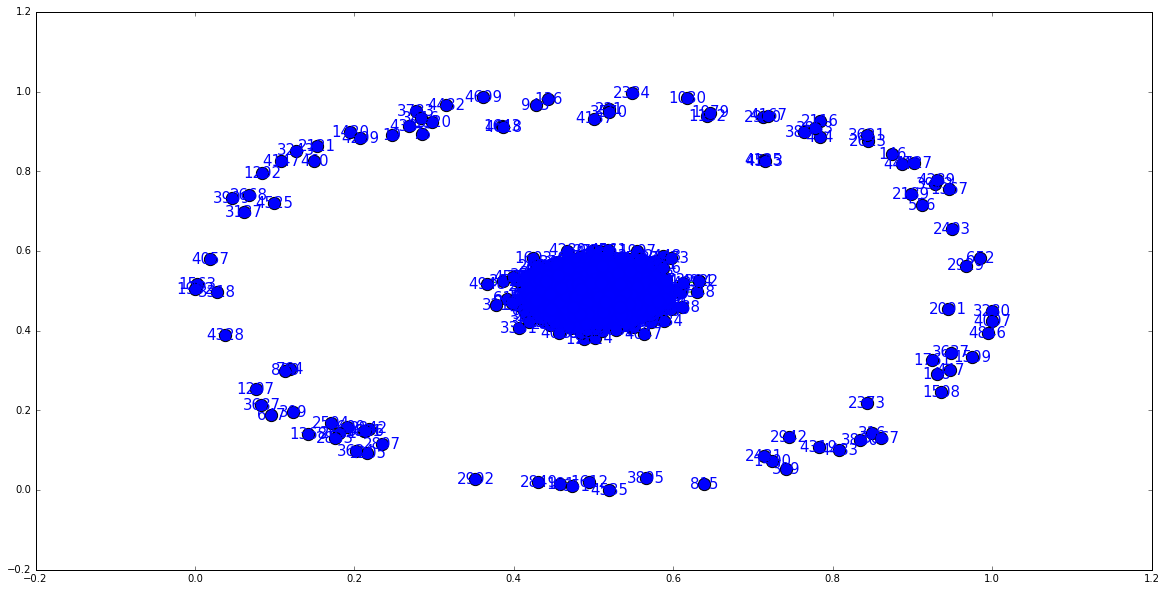

In [17]:
#Creating a random network with 5000 nodes and degree of 4

deg = 4
nodes = 5000
prob = deg/ (nodes-1)
prob

rnd_G = nx.fast_gnp_random_graph(nodes, prob, seed=None, directed=False)

plt.figure(figsize = (20,10))
nx.draw_networkx(rnd_G, node_color = 'b', node_size = 150, edge_color = 'g', font_size = 15, font_color = 'b')


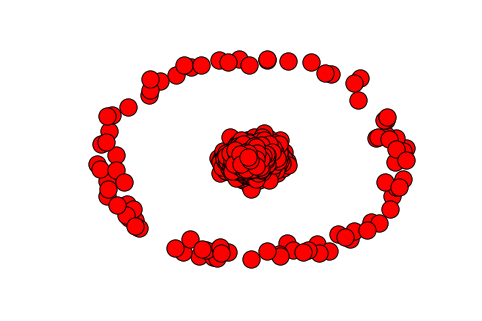

In [18]:
# Building a ER Model for 5000 nodes and degree of 4

K = 4
N= 5000
P = K/ (N-1)
P

er = nx.erdos_renyi_graph(N, P, seed=None, directed=False)

nx.draw(er)

plt.show()


# Compare the network you've just built to the ER network of same size and same p. 
What are the differences? 
Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

On checking their 

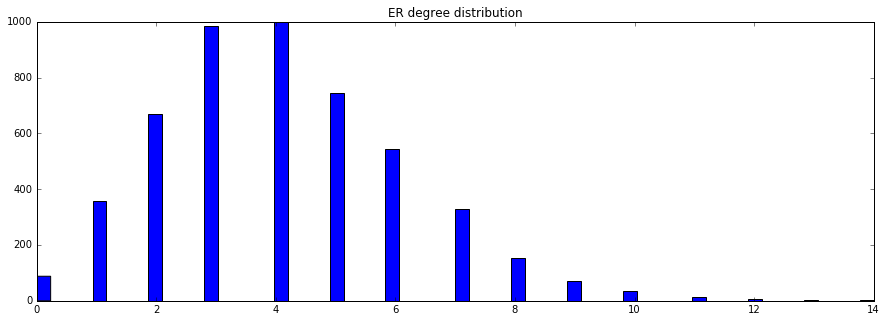

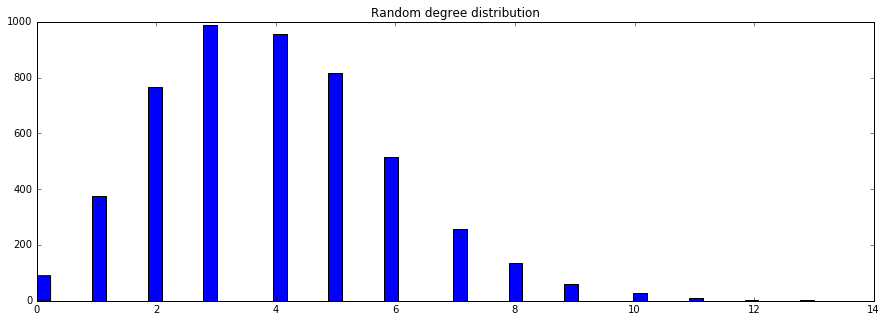

In [69]:
# Checking the mean, variance and std deviation for the random graph

rnd_deg_dist = rnd_G.degree()
#print rnd_deg_dist

er_deg_dist = er.degree()
#print er_deg_dist


plt.figure(num=None, figsize=(15,5),dpi=1200)
plt.hist(er_deg_dist.values(), bins='auto')
plt.title("ER degree distribution")  # plt.hist passes it's arguments to np.histogram


plt.figure(num=None, figsize=(15,5),dpi=1200)
plt.hist(rnd_deg_dist.values(), bins='auto')
plt.title("Random degree distribution")  # plt.hist passes it's arguments to np.histogram

plt.show()


# Part Two: The Wikipedia Philosopher's network

This exercise assumes that you have downloaded and created the directed network of philosophers on Wikipedia, based on the six branches of philosophy on you own.

Basic stats:

First put together an overview of the 7 lists you created as part of lecture 4.

Let's put together some descriptive statistics:
* How many philosophers in each list? How many total?
* Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages)
* Which philosopher is in most lists & and how many?
* Let's investigate philosophers active in multiple sub-fields in more detail.
* Create a list of every philosopher that occurs in more than one list.
* Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).
* Print the top 5 guys and their list counts. Have you heard of any of them?

# Part A: Download Philosopher-pages from Wikipedia
Armed with some knowledge of regular expressions, we're going to start extracting all the names of philosophers on Wikipedia. These will be the nodes of our network.

In [31]:
list_of_philo=[]
list_of_list1=[]
for files in os.listdir("./philosopher"):
    if files.endswith(".txt"):
        f = io.open("./philosopher/"+files, 'r', encoding='utf-8')
        link = re.findall(r'\*.*\[\[(.+?)\]\]?',f.read())
        name = []
        for k in link:
            name += [k.split('|')[0]]
        list_of_philo += [files.split('.')[0]]
        list_of_list1 += [name]
print list_of_philo

['aestheticians', 'epistemologists', 'ethicists', 'logicians', 'metaphysicians', 'political']


We have manually removed the bottom part of ethicists and potical because they had some data also with same syntax as the link for the persons. We also removed (see...[[some work/philosoherps]]...) in aestheticians, because we did not find a way to only take the first match from each line.

In [32]:
# Determining the philosophers in each list and total philosophers
j=0
for i in list_of_philo:
    len_list = str(len(list_of_list1[j]))
    j = j+1
    print "The amount of philosophers in %s : %s" % (i,len_list)
set_of_philosophers =set()
set_of_dup =set()

for i in range(len(list_of_list1)):
    for j in list_of_list1[i]:
        x = len(set_of_philosophers)
        set_of_philosophers.add(j)
        if x == len(set_of_philosophers):
            set_of_dup.add(j)
            
print "The total amount of philosophers is %s" %len(set_of_philosophers)
#print len(set_of_dup)

The amount of philosophers in aestheticians : 126
The amount of philosophers in epistemologists : 99
The amount of philosophers in ethicists : 272
The amount of philosophers in logicians : 274
The amount of philosophers in metaphysicians : 96
The amount of philosophers in political : 295
The total amount of philosophers is 1019


In [33]:
#Determining the largest branch of philosophy

max_branch = max(enumerate(len(sub) for sub in list_of_list1), key=itemgetter(1))
print "The largest branch of philosophy is %s with %s philosophies." %(list_of_philo[max_branch[0]], max_branch[1])

The largest branch of philosophy is political with 295 philosophies.


In [34]:
#Determining the philosophers that are in more than 1 list

print "There are %s that appear in more than one list." %len(set_of_dup)

There are 117 that appear in more than one list.


In [35]:
#Determing which philosophers is in most lists and how many

list_of_names= []
for i in range(len(list_of_list1)):
    for j in list_of_list1[i]:
        list_of_names.append(j)
names_count = Counter(list_of_names)
for k in range(len((names_count))):
        if names_count[k] < 2:
            del names_count[k]
names_count = names_count.most_common()
print "The philosopher that occur in most lists is %s and the philosopher appear %s times." %(names_count[0][0],names_count[0][1])

The philosopher that occur in most lists is Thomas Aquinas and the philosopher appear 6 times.


In [36]:
#Investigate philosophers active in multiple sub-fields. 
#Create a list of every philosopher that occurs in more than one list. 
#Use Python to sort the list according to how many lists each philosopher belongs to 
# So the guy you found in the previous question is first in that list.

for i in range(len(names_count)):
    print "%s appear in %s lists." %(names_count[i][0],names_count[i][1])

Thomas Aquinas appear in 6 lists.
Bertrand Russell appear in 5 lists.
Aristotle appear in 5 lists.
Plato appear in 4 lists.
Immanuel Kant appear in 4 lists.
Ayn Rand appear in 4 lists.
Gottfried Leibniz appear in 3 lists.
Georg Wilhelm Friedrich Hegel appear in 3 lists.
Nelson Goodman appear in 3 lists.
Ludwig Wittgenstein appear in 3 lists.
John Locke appear in 3 lists.
Judith Butler appear in 3 lists.
John Stuart Mill appear in 3 lists.
Ruth Barcan Marcus appear in 3 lists.
Mario Bunge appear in 3 lists.
Susan Haack appear in 3 lists.
Christian Wolff (philosopher) appear in 2 lists.
Martin Heidegger appear in 2 lists.
Baruch Spinoza appear in 2 lists.
Socrates appear in 2 lists.
Joxe Azurmendi appear in 2 lists.
George Berkeley appear in 2 lists.
Mozi appear in 2 lists.
Giambattista Vico appear in 2 lists.
Berit Brogaard appear in 2 lists.
David Chalmers appear in 2 lists.
Walter Benjamin appear in 2 lists.
Graham Priest appear in 2 lists.
Thomas Nagel appear in 2 lists.
Hilary Putna

In [40]:
list_of_philosophers = list(set_of_philosophers)

print list_of_philosophers[0]

Christian Wolff (philosopher)


In [48]:
#creating the url
#convert set to list

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json" 
for i in range(len(list_of_philosophers)):
    title = "titles=%s" %list_of_philosophers[i].replace(" ", "_").encode('utf-8')
    query= '%s%s&%s&%s&%s' %(baseurl,action,title,content,dataformat)
    wikireponse = urllib2.urlopen(query)
    wikisource = wikireponse.read()
    wikijson = json.loads(wikisource)
    filename = "./json/%s.txt" %list_of_philosophers[i].replace(" ", "_")
    with io.open(filename, 'w',encoding='utf-8') as outfile:
        outfile.write(unicode(json.dumps(wikijson, ensure_ascii=False)))

IOError: [Errno 2] No such file or directory: './json/Christian_Wolff_(philosopher).txt'

In [47]:
match = []
#names = []

for philosoherps in list_of_philosophers:
    filename = philosoherps.replace(' ', '_')
    with io.open('./json/'+filename+".txt",'r',encoding='utf-8') as files:
        link = re.findall(r'\[\[(.+?)\]\]?',files.read())
        for item in link:
            item = item.split('|')[0]
            if item in list_of_philosophers:
                match.append((philosoherps, item))
print match[:10]

Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian Wolff (philosopher)
Christian 

In [45]:
print len(match)

0


In [46]:
G = nx.DiGraph()

G.add_nodes_from(list_of_philosophers)
G.add_edges_from(match)

In [ ]:
pos = pos=nx.spring_layout(G, scale=2)
plt.figure(num=None, figsize=(10, 10), dpi=1200)
nx.draw(G,pos, node_color='#3E9651', edge_color='#535154')
plt.show()

# Degree distributions

Why do you think we want to use a directed graph? Could have we used an undirected graph instead?

What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?


Provide similar statistics for:

List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?


Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree?

Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?

Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out?

In [ ]:
print "The total number of nodes in the network is %s." %nx.number_of_nodes(G)
print "The total number of links in the network is %s. The total number of edges is less than" %G.number_of_edges()
print "the length of match because duplicates will not be added to the graph."
print "The average degree is %s" %np.mean(nx.degree(G).values())
print "The median degree is %s" %np.median(nx.degree(G).values())


In [ ]:
print "Top 10 philosophers by in-degree:\n"
pri = sorted(G.in_degree_iter(),key=itemgetter(1),reverse=True)[:10]
for i in range(len(pri)):
    if len(pri[i][0]) > 24:
        print "%s\t%s" %(pri[i][0],pri[i][1])
    elif len(pri[i][0]) > 15:
        print "%s%s%s" %(pri[i][0],'\t\t',pri[i][1])
    elif len(pri[i][0]) > 8:
        print "%s%s%s" %(pri[i][0],'\t\t\t',pri[i][1]) 
    else:
        print "%s%s%s" %(pri[i][0],'\t\t\t\t',pri[i][1])
print
print "Top 10 philosophers by out-degree:\n"
pri = sorted(G.out_degree_iter(),key=itemgetter(1),reverse=True)[:10]
for i in range(len(pri)):
    if len(pri[i][0]) > 24:
        print "%s\t%s" %(pri[i][0],pri[i][1])
    elif len(pri[i][0]) > 15:
        print "%s%s%s" %(pri[i][0],'\t\t',pri[i][1])
    elif len(pri[i][0]) > 8:
        print "%s%s%s" %(pri[i][0],'\t\t\t',pri[i][1]) 
    else:
        print "%s%s%s" %(pri[i][0],'\t\t\t\t',pri[i][1])

In [ ]:
in_de = G.in_degree().values()
out_de = G.out_degree().values()
in_de_max = max(in_de)
out_de_max = max(out_de)

plt.figure(num=None, figsize=(15, 5), dpi=1200)
plt.subplot(1,2,1)
plt.title('In degree')
plt.hist(in_de,bins=range(in_de_max),color='teal')
plt.ylabel('Number of nodes with n links')
plt.xlabel('Number of links (n)')
plt.subplot(1,2,2)
plt.title('Out degree')
plt.hist(out_de,bins=range(out_de_max),color='teal')
plt.ylabel('Number of nodes with n links')
plt.xlabel('Number of links (n)')

plt.show()

This pattern matches the power law mentioned in the Barabasi book. Most of the nodes have a low amount of links and few nodes with many links(Hubs). The spread of links is over twice the size with in degree compared to out degree. It can be observed that most of the nodes have 20 or less links.

In [ ]:

plt.figure(num=None, figsize=(15, 5), dpi=1200)

plt.subplot(1,2,1)
plt.title('In degree')
plt.hist(in_de,bins=range(in_de_max),color='teal')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
plt.title('Out degree')
plt.hist(out_de,bins=range(out_de_max),color='teal')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')

plt.show()

In [ ]:
plt.figure(num=None, figsize=(15, 5), dpi=1200)
plt.subplot(1,2,1)
plt.scatter(in_de,out_de)
plt.subplot(1,2,2)
plt.scatter(in_de,out_de)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
# this create the kernel, given an array it will estimate the probability over that values
kde = stats.gaussian_kde(in_de)
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(in_de), max(in_de), 100 )
# plot the results
plt.hist(kde(dist_space))